In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/train(1).csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [ ]:
df.head()

FireplaceQu GarageQual  SalePrice
0         NaN         TA     208500
1          TA         TA     181500
2          TA         TA     223500
3          Gd         TA     140000
4          TA         TA     250000

In [ ]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

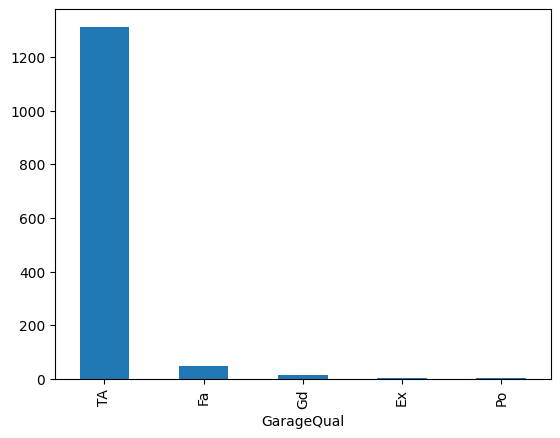

In [ ]:
df['GarageQual'].value_counts().plot(kind='bar')

In [ ]:
df['GarageQual'].mode()


0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

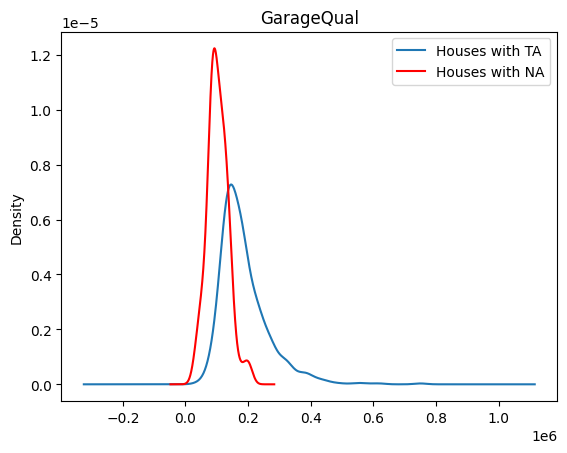

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [ ]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [ ]:
df['GarageQual'].fillna('TA', inplace=True)

<Axes: xlabel='GarageQual'>

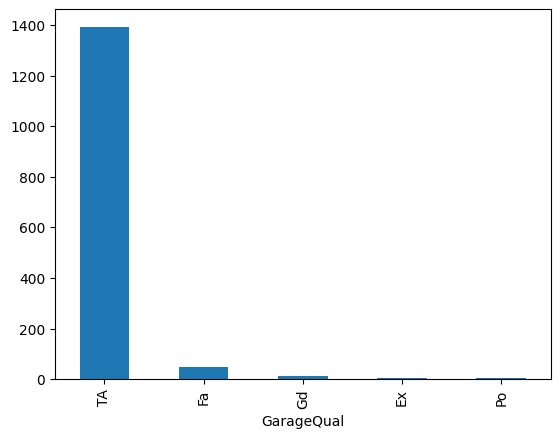

In [ ]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

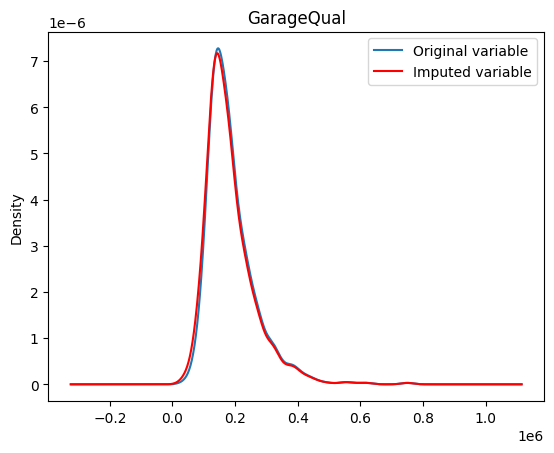

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

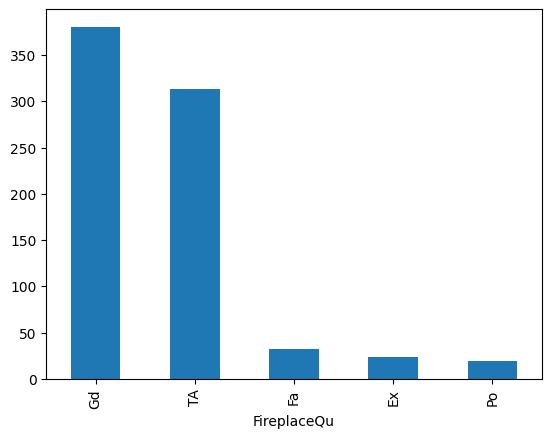

In [ ]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [ ]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

In [ ]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [ ]:
df['FireplaceQu'].fillna('Gd', inplace=True)

Text(0.5, 1.0, 'FireplaceQu')

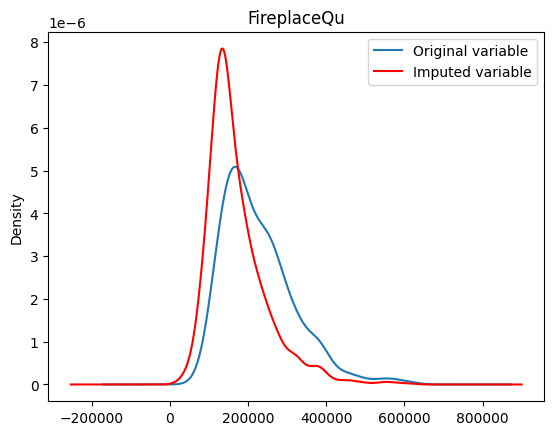

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

In [ ]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)